In [ ]:
import sys
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
%cd drive/MyDrive/Colab Notebooks/stylometry-toolkit
sys.path.append('/content//drive/MyDrive/Colab Notebooks/sylometry-toolkit')

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

from stylometry import TextDataset, TextSample

In [27]:
text_dataset = pd.read_csv('victorian-authors.csv')
text_dataset.head()

,text,author
0,ou have time to listen i will give you the ent...,1
1,wish for solitude he was twenty years of age a...,1
2,and the skirt blew in perfect freedom about th...,1
3,of san and the rows of shops opposite impresse...,1
4,an hour s walk was as tiresome as three in a s...,1


In [40]:
no_of_authors = 5

# randomly sample required number of authors
author_list = text_dataset['author'].sample(no_of_authors, replace=False).values

# extract the texts by these randomly chosen authors
bool_mask = text_dataset['author'].isin(author_list)
data = text_dataset[bool_mask]
data.head(), data.tail()

(                                                   text  author
 3397  t is only the railroad the arches of the railr...       8
 3398  partially enveloped the seed ned the same kind...       8
 3399  king s sake how gladly we repeat it sailing on...       8
 3400  why is this we shall soon see we push through ...       8
 3401  bear don t cry so loud bony is not here she to...       8,
                                                     text  author
 16360  bat human experience is if that means with the...      14
 16361  t show to visitors she was not staying at the ...      14
 16362  of amazement with an utterly look as if some p...      14
 16363  â the of her mental all other at length to her...      14
 16364  hang together in the same moment the is and th...      14)

In [41]:
counts = data['author'].value_counts()
counts

8     6914
14    2696
10     755
Name: author, dtype: int64

In [42]:
# find the class smallest number of texts

no_to_sample = counts.min()
sampled_list = []

# sample this number of texts from each
# author to ensure a balanced dataset
for i in counts.index:
  sampled_list.append( (data[ data['author'] == i]).sample(no_to_sample) )

data = pd.concat(sampled_list)
data.head(), data.tail()

(                                                   text  author
 8905  unfortunate in prison simply that he has recei...       8
 9574  is not at home but i take you to my sister s h...       8
 7262  tom s not a bad name thomas pinch t p c on his...       8
 7563  she could bear it was enough to leave dumb thi...       8
 9880  head swung back so that he could see nothing t...       8,
                                                     text  author
 12049  the box she the fruit of the tree was seized b...      10
 11858  of having placed their talents at the service ...      10
 11638  it would interest me because i read her life l...      10
 12092  serve her own urgent necessities and besides w...      10
 11757  it fulfilment he knew that she would wait for ...      10)

In [43]:
text_sample_list = []

for row in data.iterrows():
  text = row[1]['text']
  label = row[1]['author']
  text_sample_list.append( TextSample(text,label) )

dataset = TextDataset(*text_sample_list)
dataset.X.head()

,a,b,c,d,e,f,g,h,i,j,...,z,za,ze,zi,zl,zo,zy,zz,â,ž
0,0.023941,0.009695,0.008508,0.005738,0.003562,0.006529,0.002770,0.023744,0.011080,0.001781,...,0.0,0.0,0.000396,0.000000,0.0,0.0,0.0,0.0,0.000791,0.0
1,0.021770,0.007935,0.006307,0.005086,0.003052,0.005900,0.002645,0.013632,0.019125,0.000407,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000814,0.0
2,0.022472,0.006572,0.004452,0.004452,0.004028,0.004452,0.002120,0.013356,0.015052,0.001272,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.002756,0.0
3,0.022891,0.010216,0.007756,0.004540,0.003784,0.007756,0.002838,0.008702,0.008513,0.000378,...,0.0,0.0,0.000378,0.000189,0.0,0.0,0.0,0.0,0.002270,0.0
4,0.022751,0.014757,0.003074,0.006354,0.002664,0.009223,0.003074,0.017217,0.015782,0.000205,...,0.0,0.0,0.000205,0.000000,0.0,0.0,0.0,0.0,0.001640,0.0


In [44]:
dataset(n=5, most_frequent = 10000)
dataset.X.head()

,the,and,that,that,was,her,his,with,n the,you,...,wn hi,ke me,him c,t alo,nsive,ensiv,dful,rs on,rew h,ng pr
0,0.010889,0.007721,0.002376,0.002376,0.002772,0.000990,0.004554,0.002574,0.001980,0.000198,...,0.0,0.000000,0.000198,0.0,0.0,0.0,0.0,0.000198,0.0,0.0
1,0.006107,0.004479,0.004886,0.004886,0.002443,0.001221,0.001832,0.002443,0.001425,0.003664,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.005303,0.007637,0.004031,0.004031,0.001697,0.000849,0.003182,0.001061,0.001061,0.008485,...,0.0,0.000212,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.010600,0.012871,0.003218,0.003218,0.002650,0.000946,0.000379,0.002082,0.002839,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.014356,0.009229,0.003076,0.003076,0.004102,0.005947,0.000820,0.002256,0.002461,0.000000,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [47]:
x_train, x_test, y_train, y_test = tts(dataset.X, dataset.Y, test_size=0.1)

In [97]:
model = SVC(kernel='linear')

candidate_params = {'C' : np.linspace(0.5,5,10)}

search = GridSearchCV(model,candidate_params,cv=3)
search.fit(x_train,y_train.values.flatten())

print(search.best_params_['C'])

2.5


In [126]:
model = SVC(kernel='linear')
model.fit(x_train,y_train.values.flatten())

train_preds = model.predict(x_train)
test_preds = model.predict(x_test)

print(f'Training Set Accuracy {f1_score(train_preds,y_train, average="micro")}')
print(f'Test Set Accuracy { f1_score(test_preds,y_test, average="micro") }')
print(f'F1 score {f1_score(y_test, test_preds,  average = "macro")}')

Training Set Accuracy 0.5875
Test Set Accuracy 0.4583333333333333
F1 score 0.45659802098038665


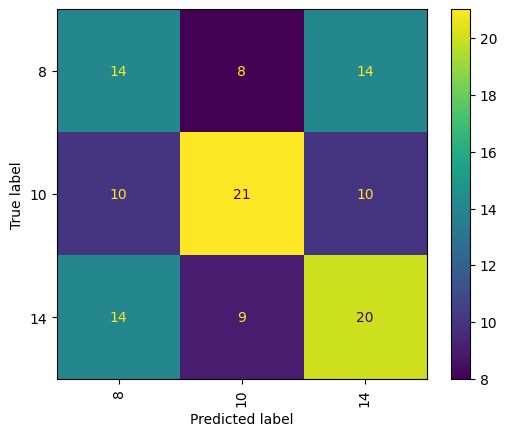

In [127]:
labels = np.sort( y_test['label'].unique() )
confusion_plot = ConfusionMatrixDisplay( confusion_matrix(y_test, test_preds), display_labels = labels)
confusion_plot.plot(xticks_rotation=90);